In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd

csv_path='data9.csv'
raw = pd.read_csv(csv_path)
raw.eval('phrXndvi=phreat*ndvi',inplace=True)
raw.eval('phrXd1ndvi=phreat*d1ndvi',inplace=True)
raw.eval('phrXd1ndvi=phreat*d2ndvi',inplace=True)
raw.head()

,x,y,d1prec,d2prec,prec,d1ndvi,d2ndvi,ndvi,d1temp,d2temp,...,d1sat3,d2sat3,sat3,d1sat4,d2sat4,sat4,gwlvl,truth,phrXndvi,phrXd1ndvi
0,0,0,0.0809,2.6985,21.1165,-24.8999,36.3333,3075.0,0.0244,0.4402,...,2319.0,6.5599,154.4167,2947.5,-4.6367,-55.2222,26.7355,-0.2732,-0.0,-0.0
1,0,2,0.0809,2.6985,21.1165,20.0702,398.3333,3258.0,0.0244,0.4402,...,2721.0,0.7007,207.5000,2867.5,-9.0041,-167.1667,28.0769,-0.2727,0.0,0.0
2,0,4,0.0882,1.7168,18.8570,3.8617,271.4444,3394.0,0.0275,0.4194,...,2236.0,2.1207,-51.0556,2833.5,-6.4376,-161.2778,25.4791,-0.2532,0.0,0.0
3,0,6,0.0882,1.7168,18.8570,-5.1558,77.6667,3742.0,0.0275,0.4194,...,1709.0,-2.9649,-54.7222,2623.0,-3.9241,-15.5833,68.9483,-0.4340,0.0,0.0
4,0,8,0.0882,1.7168,18.8570,23.6842,170.3333,3026.0,0.0275,0.4194,...,1958.0,-0.0712,45.8889,2282.0,-3.8493,-27.2222,63.7688,-0.3822,0.0,0.0


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161472 entries, 0 to 161471
Data columns (total 34 columns):
x             161472 non-null int64
y             161472 non-null int64
d1prec        161472 non-null float64
d2prec        161472 non-null float64
prec          161472 non-null float64
d1ndvi        160935 non-null float64
d2ndvi        160935 non-null float64
ndvi          161459 non-null float64
d1temp        161472 non-null float64
d2temp        161472 non-null float64
temp          161472 non-null float64
evapot        161472 non-null float64
elevation     161472 non-null float64
soilmo        161472 non-null float64
phreat        161472 non-null float64
d1sat0        161466 non-null float64
d2sat0        161432 non-null float64
sat0          161432 non-null float64
d1sat1        161466 non-null float64
d2sat1        161432 non-null float64
sat1          161432 non-null float64
d1sat2        161466 non-null float64
d2sat2        161432 non-null float64
sat2          16143

In [4]:
raw.describe()

,x,y,d1prec,d2prec,prec,d1ndvi,d2ndvi,ndvi,d1temp,d2temp,...,d1sat3,d2sat3,sat3,d1sat4,d2sat4,sat4,gwlvl,truth,phrXndvi,phrXd1ndvi
count,161472.000000,161472.000000,161472.000000,161472.000000,161472.000000,160935.000000,160935.000000,161459.000000,161472.000000,161472.000000,...,161466.000000,161432.000000,161432.000000,161466.000000,161432.000000,161432.000000,161472.000000,161472.000000,1.614590e+05,160935.000000
mean,347.000000,463.000000,0.099663,-1.261749,18.571178,10.611832,52.043671,2216.491444,0.013636,0.424823,...,2789.146467,2.099181,-69.221677,3340.647251,7.695363,77.458694,97.198529,0.031472,2.655087e+04,784.252997
std,200.917686,267.890732,0.309912,5.634609,9.245272,18.392937,237.534611,1134.268850,0.025856,0.281742,...,655.740452,22.218538,362.442621,774.450623,17.498880,275.893439,73.900674,0.324852,1.127188e+05,14523.961367
min,0.000000,0.000000,-2.478200,-42.033300,4.665000,-296.687300,-3522.444400,-1161.000000,-0.111900,-1.063100,...,104.500000,-517.668200,-10099.305600,55.000000,-623.887500,-9593.055600,-43.792100,-8.280800,-3.843878e+05,-469928.289920
25%,173.500000,231.500000,0.002600,-2.865700,11.975875,3.731700,-40.055600,1456.000000,-0.004200,0.262500,...,2378.500000,-1.834525,-115.166700,2921.000000,0.643850,-18.388900,44.997700,-0.035600,-0.000000e+00,0.000000
50%,347.000000,463.000000,0.116600,-0.254000,16.357500,9.488600,32.666700,1933.000000,0.014100,0.414100,...,2664.000000,4.586700,-15.944400,3296.500000,6.242000,63.680550,77.495250,0.015000,0.000000e+00,0.000000
75%,520.500000,694.500000,0.247500,1.719700,22.693000,16.729600,124.569450,2706.000000,0.031200,0.593600,...,3051.000000,10.618825,64.416700,3706.000000,12.670550,155.388900,130.254225,0.090200,0.000000e+00,0.000000
max,694.000000,926.000000,1.373900,18.952100,94.660500,374.950500,3558.555600,7832.000000,0.097300,1.634300,...,20000.000000,428.489700,12787.222200,20000.000000,826.557800,14486.694400,735.083900,5.080300,1.935345e+06,782269.161000


In [5]:
raw2=raw.drop(['x','y'],axis=1)
raw2.head()

,d1prec,d2prec,prec,d1ndvi,d2ndvi,ndvi,d1temp,d2temp,temp,evapot,...,d1sat3,d2sat3,sat3,d1sat4,d2sat4,sat4,gwlvl,truth,phrXndvi,phrXd1ndvi
0,0.0809,2.6985,21.1165,-24.8999,36.3333,3075.0,0.0244,0.4402,7.1635,7.6555,...,2319.0,6.5599,154.4167,2947.5,-4.6367,-55.2222,26.7355,-0.2732,-0.0,-0.0
1,0.0809,2.6985,21.1165,20.0702,398.3333,3258.0,0.0244,0.4402,7.1635,7.6555,...,2721.0,0.7007,207.5000,2867.5,-9.0041,-167.1667,28.0769,-0.2727,0.0,0.0
2,0.0882,1.7168,18.8570,3.8617,271.4444,3394.0,0.0275,0.4194,7.3980,7.6555,...,2236.0,2.1207,-51.0556,2833.5,-6.4376,-161.2778,25.4791,-0.2532,0.0,0.0
3,0.0882,1.7168,18.8570,-5.1558,77.6667,3742.0,0.0275,0.4194,7.3980,7.6555,...,1709.0,-2.9649,-54.7222,2623.0,-3.9241,-15.5833,68.9483,-0.4340,0.0,0.0
4,0.0882,1.7168,18.8570,23.6842,170.3333,3026.0,0.0275,0.4194,7.3980,7.6555,...,1958.0,-0.0712,45.8889,2282.0,-3.8493,-27.2222,63.7688,-0.3822,0.0,0.0


In [6]:
raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161472 entries, 0 to 161471
Data columns (total 32 columns):
d1prec        161472 non-null float64
d2prec        161472 non-null float64
prec          161472 non-null float64
d1ndvi        160935 non-null float64
d2ndvi        160935 non-null float64
ndvi          161459 non-null float64
d1temp        161472 non-null float64
d2temp        161472 non-null float64
temp          161472 non-null float64
evapot        161472 non-null float64
elevation     161472 non-null float64
soilmo        161472 non-null float64
phreat        161472 non-null float64
d1sat0        161466 non-null float64
d2sat0        161432 non-null float64
sat0          161432 non-null float64
d1sat1        161466 non-null float64
d2sat1        161432 non-null float64
sat1          161432 non-null float64
d1sat2        161466 non-null float64
d2sat2        161432 non-null float64
sat2          161432 non-null float64
d1sat3        161466 non-null float64
d2sat3        1

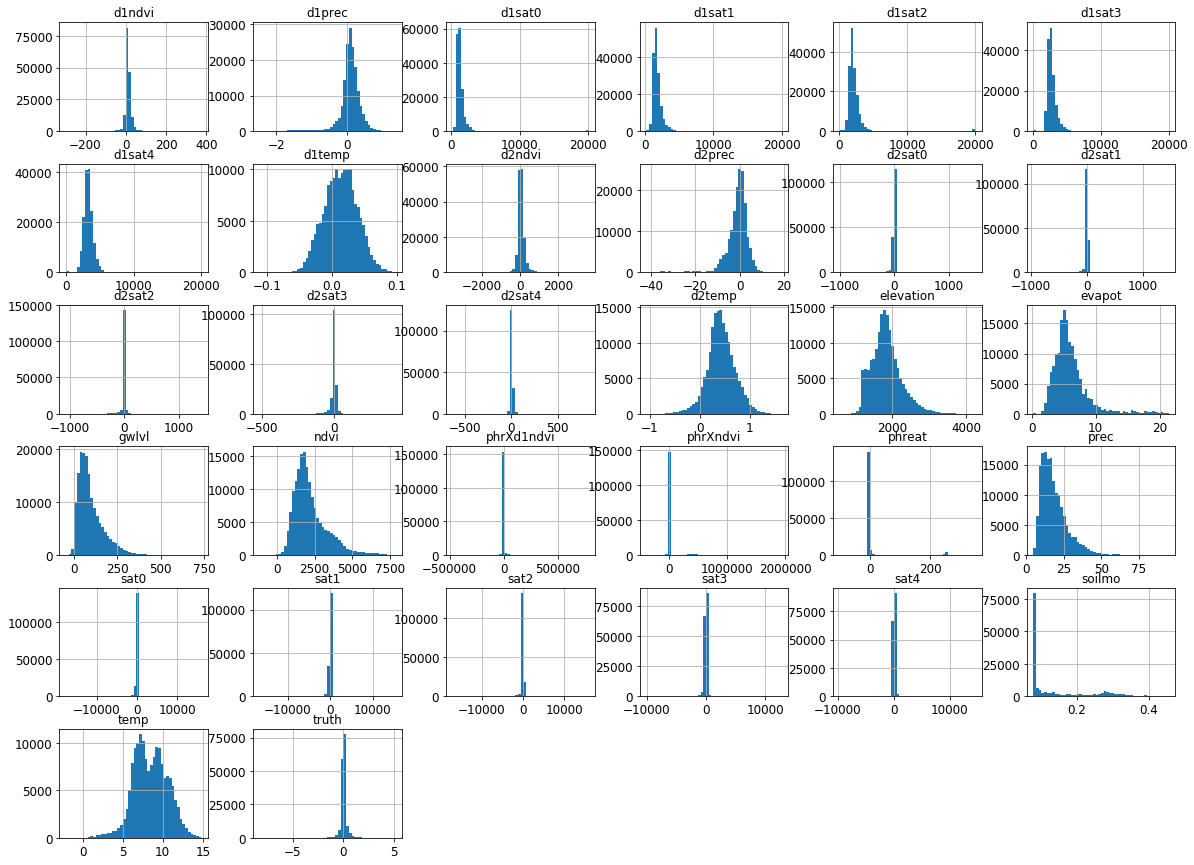

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
raw2.hist(bins=50, figsize=(20,15))

plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw2, test_size=0.2)
print(len(train_set), "train +", len(test_set), "test")

129177 train + 32295 test


In [9]:
test_set.head()

,d1prec,d2prec,prec,d1ndvi,d2ndvi,ndvi,d1temp,d2temp,temp,evapot,...,d1sat3,d2sat3,sat3,d1sat4,d2sat4,sat4,gwlvl,truth,phrXndvi,phrXd1ndvi
36789,0.2873,2.5901,14.2325,3.1414,13.5556,1233.0,0.0054,0.2462,9.9385,3.6058,...,4629.0,4.2699,50.3611,4832.5,1.7224,-31.7222,55.1315,0.0938,5364.6597,58.979060
149129,0.0600,2.3570,9.4035,-4.5129,-3.7222,693.0,0.0409,0.8141,13.5775,4.9901,...,2670.0,3.3576,41.4722,3410.0,9.6667,54.9444,66.3344,-0.2053,0.0000,-0.000000
6208,0.0366,-1.4610,13.6730,21.3416,-270.0000,1863.0,0.0600,0.4218,8.3260,4.7184,...,2280.5,9.3524,-195.1944,3305.0,16.9907,88.2222,57.0195,0.0350,457428.3516,-66293.964000
80895,0.0586,-1.8447,7.5585,-4.6295,7.1111,1312.0,0.0181,0.3990,12.5345,3.0259,...,2999.5,15.0537,108.0556,3716.0,8.8710,133.3333,93.3516,-0.1613,548.9408,2.975284
147777,-0.0351,1.1167,8.2635,2.0815,7.2778,253.0,0.0486,0.8720,11.9740,3.4570,...,4939.5,29.7425,313.8611,4396.0,21.2993,212.7222,54.6337,0.0637,0.0000,0.000000


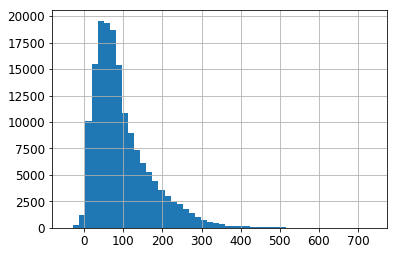

In [10]:
raw2['gwlvl'].hist(bins=50)

In [11]:
raw2['truth'].describe()

count    161472.000000
mean          0.031472
std           0.324852
min          -8.280800
25%          -0.035600
50%           0.015000
75%           0.090200
max           5.080300
Name: truth, dtype: float64

In [12]:
train=train_set.copy()

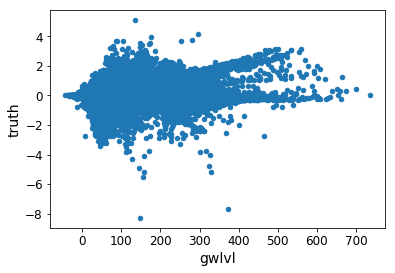

In [13]:
train.plot(kind='scatter',x='gwlvl',y='truth')

In [24]:
train.plot(kind="scatter", x="y", y="x", alpha=0.4,
    s=train["gwlvl"]/2, label="population", figsize=(10,7),
    c="truth", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")

KeyError: 'y'

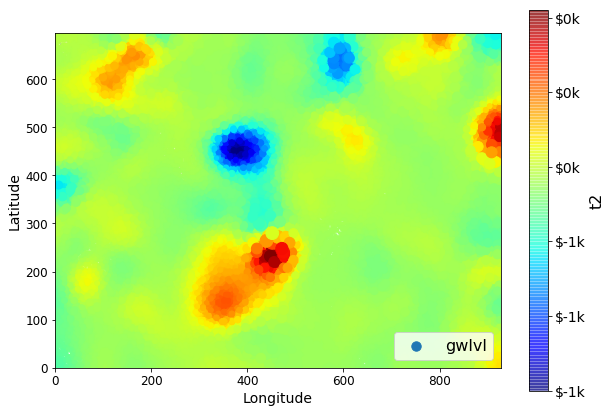

In [13]:
import matplotlib.image as mpimg
nevada_img=mpimg.imread('nevada.jpg')
ax = train.plot(kind="scatter", x="y", y="x", figsize=(10,7),
                       s=train['gwlvl']/2, label="gwlvl",
                       c="t1", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=1,
                      )
plt.imshow(nevada_img, alpha=0.5,
           cmap=plt.get_cmap("jet"),extent=(0,928,0,696))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = train["t2"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('t2', fontsize=16)

plt.legend(fontsize=16)
#save_fig("california_housing_prices_plot")
plt.show()

In [44]:
corr_matrix = train.corr()

In [45]:
corr_matrix["truth"].sort_values(ascending=False)

truth         1.000000
soilmo        0.062301
prec          0.055166
phrXndvi      0.046800
phreat        0.046181
d1ndvi        0.043312
d1sat4        0.040260
gwlvl         0.035681
phrXd1ndvi    0.031796
d2ndvi        0.022543
evapot        0.018190
d1sat3        0.012387
temp          0.011403
d2prec        0.010671
d2temp        0.007553
ndvi          0.003186
d1sat0        0.002935
d1sat1        0.000486
d1sat2       -0.000074
d2sat4       -0.005257
d1temp       -0.013066
sat4         -0.015066
d2sat0       -0.015880
d2sat1       -0.017086
d2sat3       -0.017225
d2sat2       -0.019001
d1prec       -0.026151
sat0         -0.029928
sat2         -0.029999
sat1         -0.031116
sat3         -0.032930
elevation    -0.038130
Name: truth, dtype: float64

In [46]:
corr_matrix["truth"].sort_values(ascending=False)

truth         1.000000
soilmo        0.062301
prec          0.055166
phrXndvi      0.046800
phreat        0.046181
d1ndvi        0.043312
d1sat4        0.040260
gwlvl         0.035681
phrXd1ndvi    0.031796
d2ndvi        0.022543
evapot        0.018190
d1sat3        0.012387
temp          0.011403
d2prec        0.010671
d2temp        0.007553
ndvi          0.003186
d1sat0        0.002935
d1sat1        0.000486
d1sat2       -0.000074
d2sat4       -0.005257
d1temp       -0.013066
sat4         -0.015066
d2sat0       -0.015880
d2sat1       -0.017086
d2sat3       -0.017225
d2sat2       -0.019001
d1prec       -0.026151
sat0         -0.029928
sat2         -0.029999
sat1         -0.031116
sat3         -0.032930
elevation    -0.038130
Name: truth, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021028037C18>,
      dtype=object)

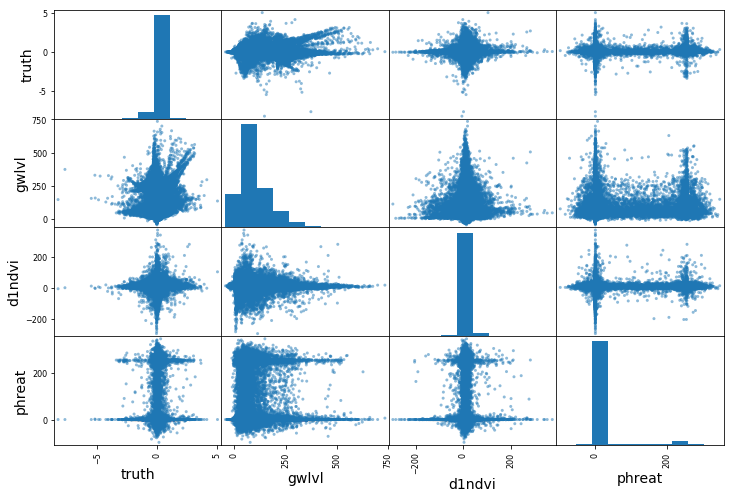

In [47]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["truth", "gwlvl", "d1ndvi",
              "phreat"]
scatter_matrix(train[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

[0, 30, 0, 320]

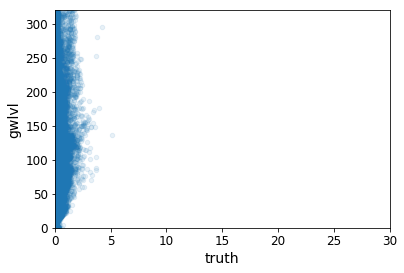

In [30]:
train.plot(kind="scatter", x="truth", y="gwlvl",
             alpha=0.1)
plt.axis([0, 30, 0, 320])
#save_fig("income_vs_house_value_scatterplot")

In [14]:
inputData=train.drop(['truth'],axis=1)
#inputData = train_set.drop(["t1","t2"], axis=1) # drop labels for training set
labels = train_set["truth"].copy()

In [15]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129177 entries, 114111 to 121958
Data columns (total 31 columns):
d1prec        129177 non-null float64
d2prec        129177 non-null float64
prec          129177 non-null float64
d1ndvi        128756 non-null float64
d2ndvi        128756 non-null float64
ndvi          129166 non-null float64
d1temp        129177 non-null float64
d2temp        129177 non-null float64
temp          129177 non-null float64
evapot        129177 non-null float64
elevation     129177 non-null float64
soilmo        129177 non-null float64
phreat        129177 non-null float64
d1sat0        129172 non-null float64
d2sat0        129142 non-null float64
sat0          129142 non-null float64
d1sat1        129172 non-null float64
d2sat1        129142 non-null float64
sat1          129142 non-null float64
d1sat2        129172 non-null float64
d2sat2        129142 non-null float64
sat2          129142 non-null float64
d1sat3        129172 non-null float64
d2sat3    

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    
    ])

x = pipeline.fit_transform(inputData)

In [19]:
x

array([[-1.95665797, -1.49035004, -1.31609663, ..., -0.18081286,
         4.7267137 ,  3.69405663],
       [-0.06304477, -0.52835288, -0.22886655, ...,  0.70742714,
        -0.23671243, -0.05611095],
       [-0.13007246,  0.15223346, -0.17237513, ..., -0.05109812,
        -0.83902976, -0.2771205 ],
       ...,
       [-0.1080537 , -0.55816334, -0.42547831, ...,  2.0262031 ,
        -0.23671243, -0.05611095],
       [-0.43736366,  0.44295227, -1.07358897, ..., -0.54551947,
        -0.23671243, -0.05611095],
       [-1.43695052, -1.84010247, -0.23400213, ...,  1.35851877,
        -0.23671243, -0.05611095]])

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
predictions=lin_reg.predict(x)

In [68]:
labels.describe()

count    129177.000000
mean          0.031915
std           0.327073
min          -8.280800
25%          -0.035700
50%           0.015000
75%           0.090100
max           5.080300
Name: truth, dtype: float64

In [69]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3220535123139868

In [70]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(labels, predictions)
lin_mae

0.1658397467768474

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x, labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [73]:
from sklearn.tree import DecisionTreeRegressor

ree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x, labels)
predictions = tree_reg.predict(x)
tree_mse = mean_squared_error(labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

8.897940357805429e-05

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x, labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [76]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.18268226 0.19182338 0.1967593  0.19322368 0.19673607 0.19423775
 0.18611021 0.20546439 0.18138019 0.18520008]
Mean: 0.19136173076736807
Standard deviation: 0.007136964390609204


In [78]:
lin_scores = cross_val_score(lin_reg, x, labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.32310639 0.32212904 0.31586975 0.32976434 0.32364825 0.3324476
 0.3167028  0.33264442 0.3182176  0.30638439]
Mean: 0.32209145654478644
Standard deviation: 0.007812867963841306


In [80]:
labels.describe()

count    129177.000000
mean          0.031915
std           0.327073
min          -8.280800
25%          -0.035700
50%           0.015000
75%           0.090100
max           5.080300
Name: truth, dtype: float64

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(x, labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [81]:
predictions = forest_reg.predict(x)
forest_mse = mean_squared_error(labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.05950252560049934

In [82]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, x, labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.13474492 0.14121831 0.13332211 0.13645407 0.14007976 0.15325058
 0.14339235 0.14681336 0.13407302 0.13685074]
Mean: 0.1400199211222144
Standard deviation: 0.006040075188480901


In [83]:
scores = cross_val_score(lin_reg, x, labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.322091
std       0.008235
min       0.306384
25%       0.317081
50%       0.322618
75%       0.328235
max       0.332644
dtype: float64

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="poly",degree=2)
svm_reg.fit(x, labels)
predictions = svm_reg.predict(x)
svm_mse = mean_squared_error(labels, predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [22]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [23]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [24]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.27041977501959485 {'max_features': 2, 'n_estimators': 3}
0.23213481928992702 {'max_features': 2, 'n_estimators': 10}
0.22283318988975953 {'max_features': 2, 'n_estimators': 30}
0.234174339217507 {'max_features': 4, 'n_estimators': 3}
0.19767750757414126 {'max_features': 4, 'n_estimators': 10}
0.18509673229807183 {'max_features': 4, 'n_estimators': 30}
0.21329867367911748 {'max_features': 6, 'n_estimators': 3}
0.17856001238437316 {'max_features': 6, 'n_estimators': 10}
0.165526094403491 {'max_features': 6, 'n_estimators': 30}
0.2011614350945486 {'max_features': 8, 'n_estimators': 3}
0.16613343672881475 {'max_features': 8, 'n_estimators': 10}
0.15475540479567046 {'max_features': 8, 'n_estimators': 30}
0.25241538815470743 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.21815199809942973 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.2294630635854918 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.19402836482068858 {'bootstrap': False, 'max_featur

In [42]:
#pd.DataFrame(grid_search.cv_results_)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x, labels)

NameError: name 'RandomForestRegressor' is not defined

In [84]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

NameError: name 'rnd_search' is not defined

In [25]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07293657, 0.07673765, 0.06652339, 0.01831401, 0.01553935,
       0.02752108, 0.07703858, 0.06655721, 0.07549669, 0.07369851,
       0.0465821 , 0.07121806, 0.0055703 , 0.01397078, 0.01226176,
       0.01334401, 0.01151982, 0.01101912, 0.01254003, 0.01202956,
       0.01053005, 0.01278855, 0.01347275, 0.01181662, 0.01101498,
       0.01598271, 0.01258733, 0.0127436 , 0.10553336, 0.00768844,
       0.00542305])

In [26]:
sorted(zip(feature_importances, list(inputData)), reverse=True)

[(0.10553335661160963, 'gwlvl'),
 (0.07703857868190721, 'd1temp'),
 (0.07673765012712049, 'd2prec'),
 (0.07549669326623813, 'temp'),
 (0.07369851361172432, 'evapot'),
 (0.0729365744462266, 'd1prec'),
 (0.07121805662715901, 'soilmo'),
 (0.06655721161258037, 'd2temp'),
 (0.06652338812813395, 'prec'),
 (0.04658209858821012, 'elevation'),
 (0.027521077254122308, 'ndvi'),
 (0.018314007133788505, 'd1ndvi'),
 (0.01598270561574613, 'd1sat4'),
 (0.015539346422276912, 'd2ndvi'),
 (0.01397077906605494, 'd1sat0'),
 (0.013472747707075565, 'd1sat3'),
 (0.01334401022448381, 'sat0'),
 (0.01278855291401099, 'sat2'),
 (0.012743599142116703, 'sat4'),
 (0.012587333208752789, 'd2sat4'),
 (0.012540034471918026, 'sat1'),
 (0.012261755089159047, 'd2sat0'),
 (0.012029559004352102, 'd1sat2'),
 (0.011816621768987965, 'd2sat3'),
 (0.01151981959125977, 'd1sat1'),
 (0.011019117914899446, 'd2sat1'),
 (0.011014976229237755, 'sat3'),
 (0.010530050474275977, 'd2sat2'),
 (0.007688435845071315, 'phrXndvi'),
 (0.005570297

In [47]:
#list(inputData)

In [48]:
final_model = grid_search.best_estimator_

X_test = test_set.drop(["t1",'t2'], axis=1)
y_test = test_set["t1"].copy()

X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [49]:
final_rmse

125.5446633627552

In [50]:
from scipy import stats

In [51]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([121.76828922, 129.21071449])

In [52]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(121.76828921628933, 129.21071449022008)

In [53]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(121.76886417524355, 129.21017264598845)

In [54]:
labels.describe()

count    32294.000000
mean         7.641171
std        157.537578
min       -933.637400
25%        -39.444500
50%          9.481950
75%         63.239000
max       1053.769500
Name: t2, dtype: float64

In [55]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=500, penalty=None, eta0=0.1) 
sgd_reg.fit(x, labels)
y=sgd_reg.predict(x)
mse = mean_squared_error(y, labels)
rmse = np.sqrt(mse)
rmse

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


152.35830516233509

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)
#x[0]
X_poly[0]


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, labels)
#lin_reg.intercept_, lin_reg.coef_

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X=x
y=labels
def plot_learning_curves(model, X, y,x1,x2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors)[x1:x2], "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors)[x1:x2], "b-", linewidth=3, label="val")
    #,extent=[0,1,0,1000]

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y,2500,30000)

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y,1100,30000)